## Importing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
housing = fetch_california_housing()

In [3]:
housing_pd = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

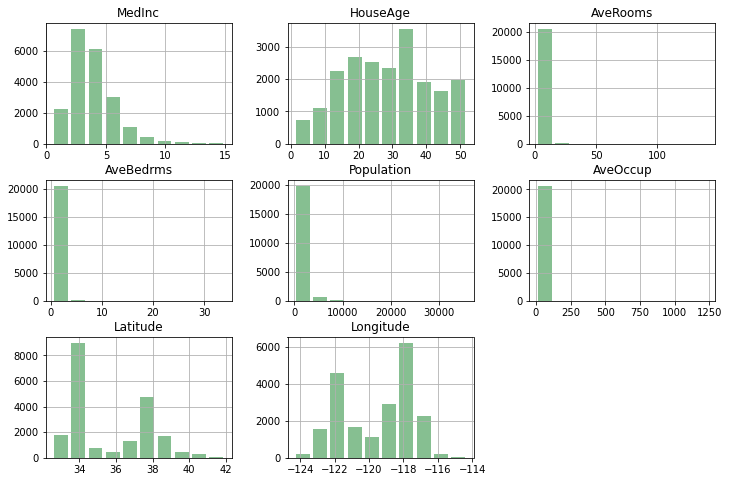

In [4]:
housing_pd.hist(rwidth=0.8, color="#86bf91", figsize=(12,8))

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, train_size=0.75)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.75)

In [6]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.fit_transform(X_valid)
# X_test = scaler.fit_transform(X_test)

In [7]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(lr=1.5 * 1E-3), metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


2022-03-22 19:02:12.046479: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/chienchouwu/Desktop/camelot_npc_ai/venv/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 0.6139 - mean_squared_error: 0.6139 - val_loss: 1.4065 - val_mean_squared_error: 1.4065
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5009 - mean_squared_error: 0.5009 - val_loss: 0.5375 - val_mean_squared_error: 0.5375
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4897 - mean_squared_error: 0.4897 - val_loss: 0.5179 - val_mean_squared_error: 0.5179
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4646 - mean_squared_error: 0.4646 - val_loss: 0.5293 - val_mean_squared_error: 0.5293
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4521 - mean_squared_error: 0.4521 - val_loss: 0.5130 - val_mean_squared_error: 0.5130
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - mean_squared_error: 0.4578 - val_loss: 0.4547 - val_mean_squared_error: 0.4547
Epoch 7/20
363/363 [===================

(0.0, 1.0)

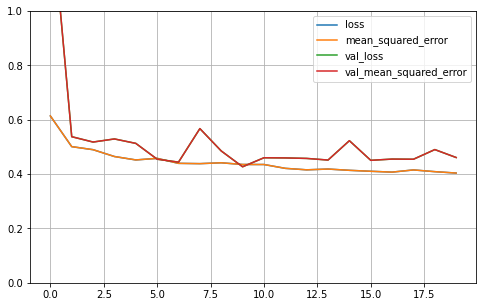

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)